# Movie Review Sentiment Analysis

* Use bing liu's dictionary



In [1]:
import csv
import sys
import os
import glob
import pandas as pd
import nltk
import matplotlib.pylab as plt
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def isNotNull(value):
    return value is not None and len(value)>0

In [3]:
neg_file = []
os.chdir('C:\Users\Miya\OneDrive\Miya\'sGithub\Text-Sentiment-Analysis-/neg')
for file in glob.glob('*.txt'):
    neg_file.append(file)
neg_content = []
for i in range(len(neg_file)):
    txt = open(neg_file[i])
    neg_content.append(txt.read())

In [4]:
pos_file = []
os.chdir('C:\Users\Miya\OneDrive\Miya\'sGithub\Text-Sentiment-Analysis-/pos')
for file in glob.glob('*.txt'):
    pos_file.append(file)
pos_content = []
for i in range(len(pos_file)):
    txt = open(pos_file[i])
    pos_content.append(txt.read())

In [5]:
Bing_senti = pd.DataFrame()
Bing_senti['pos'] = pos_content
Bing_senti['neg'] = neg_content
Bing_senti.head() 
Bing_senti

,pos,neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,..."
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs..."
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...
5,"on june 30 , 1960 , a self-taught , idealistic...",capsule : in 2176 on the planet mars police ta...
6,"apparently , director tony kaye had a major ba...","so ask yourself what "" 8mm "" ( "" eight millime..."
7,one of my colleagues was surprised when i told...,that's exactly how long the movie felt to me ....
8,"after bloody clashes and independence won , lu...",call it a road trip for the walking wounded . ...
9,the american action film has been slowly drown...,plot : a young french boy sees his parents kil...


## Load BIng Liu's Dictionary

In [6]:
os.chdir('C:\Users\Miya\OneDrive\Miya\'sGithub\Text-Sentiment-Analysis-/')
dict_pos = []
dict_neg = []
f = open('negative-words.txt','r')
for line in f:
    t= line.strip().lower();
    if (isNotNull(t)):
        dict_neg.append(t)
f.close()

f = open('positive-words.txt','r')
for line in f:
    t = line.strip().lower();
    if (isNotNull(t)):
        dict_pos.append(t)
f.close()

In [7]:
analysis_for_pos = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(pos_content[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_pos.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_pos'] = analysis_for_pos

In [8]:
analysis_for_neg = []
for i in range(len(Bing_senti)):
    tokens = nltk.word_tokenize(neg_content[i])
    neg_cnt = 0
    pos_cnt = 0
    for neg in dict_neg:
        if (neg in tokens):
            neg_cnt = neg_cnt +1
    for pos in dict_pos:
        if (pos in tokens):
            pos_cnt = pos_cnt +1
    analysis_for_neg.append(pos_cnt - neg_cnt)     
Bing_senti['Bing_analysis_for_neg'] = analysis_for_neg

In [9]:
Bing_senti.head()

,pos,neg,Bing_analysis_for_pos,Bing_analysis_for_neg
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,...",-17,-3
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...,-1,2
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...,13,-3
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs...",-5,-4
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...,-6,-10


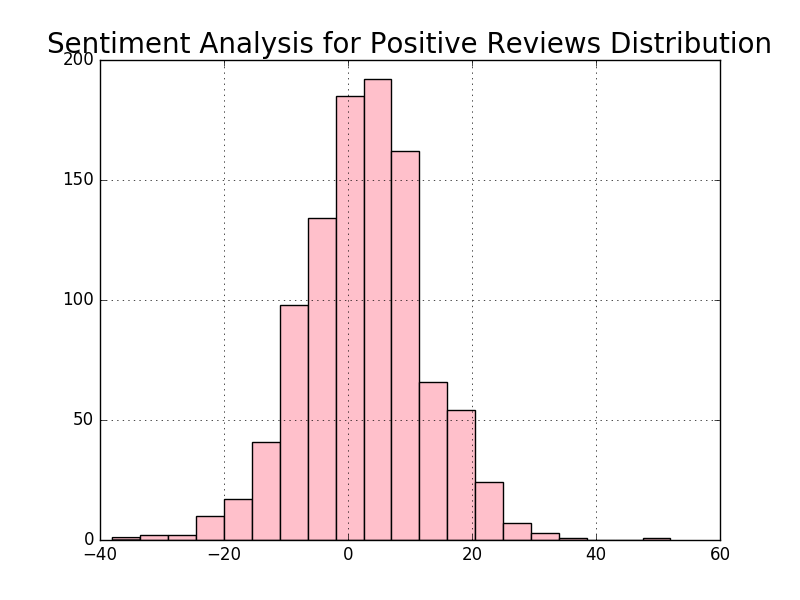

In [10]:
Bing_senti.Bing_analysis_for_pos.hist(bins = 20,color = 'pink')
plt.title('Sentiment Analysis for Positive Reviews Distribution',fontsize = 20)
plt.savefig('figure_1.png')
Image('figure_1.png')

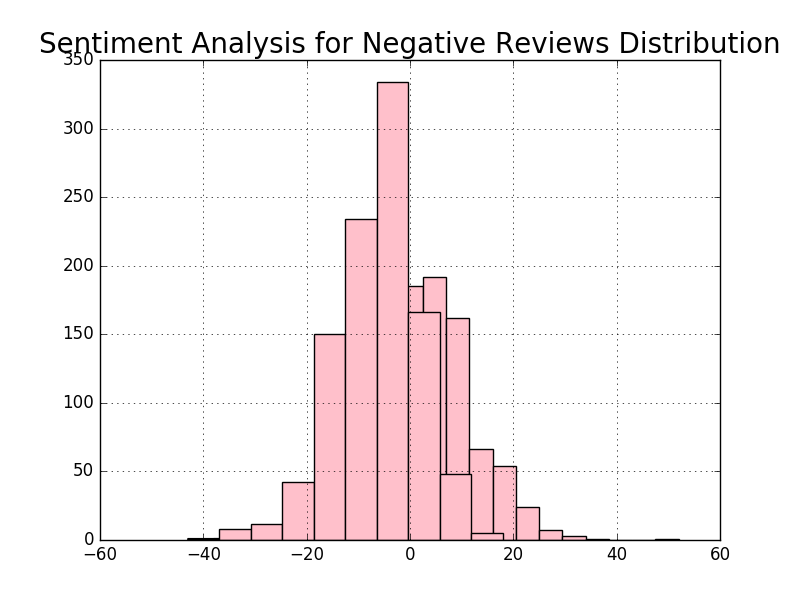

In [11]:
Bing_senti.Bing_analysis_for_neg.hist(color = 'pink')
plt.title('Sentiment Analysis for Negative Reviews Distribution',fontsize = 20)
plt.savefig('figure_2.png')
Image('figure_2.png')

In [12]:
neg_analysis_label = []
for i in analysis_for_neg:
    if i >0:
        neg_analysis_label.append(1)
    else:
        neg_analysis_label.append(0)
        
pos_analysis_label = []
for i in analysis_for_pos:
    if i >0:
        pos_analysis_label.append(1)
    else:
        pos_analysis_label.append(0)

In [13]:
Bing_senti['analysis_label_for_neg'] = neg_analysis_label
Bing_senti['analysis_label_for_pos'] = pos_analysis_label

In [14]:
Bing_senti['label_for_neg'] = [0]*len(Bing_senti)
Bing_senti['label_for_pos'] = [1]*len(Bing_senti)
Bing_senti.head()

,pos,neg,Bing_analysis_for_pos,Bing_analysis_for_neg,analysis_label_for_neg,analysis_label_for_pos,label_for_neg,label_for_pos
0,films adapted from comic books have had plenty...,"plot : two teen couples go to a church party ,...",-17,-3,0,0,0,1
1,every now and then a movie comes along from a ...,the happy bastard's quick movie review \ndamn ...,-1,2,1,0,0,1
2,you've got mail works alot better than it dese...,it is movies like these that make a jaded movi...,13,-3,0,1,0,1
3,""" jaws "" is a rare film that grabs your atten...",""" quest for camelot "" is warner bros . ' firs...",-5,-4,0,0,0,1
4,moviemaking is a lot like being the general ma...,synopsis : a mentally unstable man undergoing ...,-6,-10,0,0,0,1


In [15]:
Bing_analysis = Bing_senti.analysis_label_for_neg.tolist() + Bing_senti.analysis_label_for_pos.tolist()

In [16]:
True_label = Bing_senti.label_for_neg.tolist() + Bing_senti.label_for_pos.tolist()

In [17]:
confusion_matrix(True_label,Bing_analysis)

array([[822, 178],
       [403, 597]])

In [18]:
print classification_report(True_label,Bing_analysis)

             precision    recall  f1-score   support

          0       0.67      0.82      0.74      1000
          1       0.77      0.60      0.67      1000

avg / total       0.72      0.71      0.71      2000



In [19]:
Bing_senti.to_csv('Bing_Output.csv')